In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from scipy import stats
import pomengranate as pom

%matplotlib inline

sns.set_style("whitegrid")

/Users/conormd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


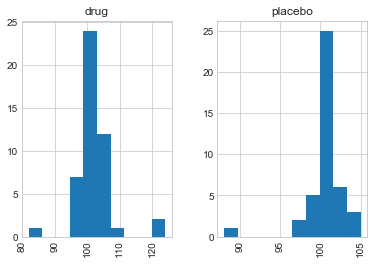

In [3]:
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug) 
y2 = np.array(placebo)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['drug']*len(drug), ['placebo']*len(placebo)]))

y.hist('value', by='group');

In [4]:
print(y1.mean())
print(y2.mean())

101.91489361702128
100.35714285714286


if you fit this data using a normal distribution the data will

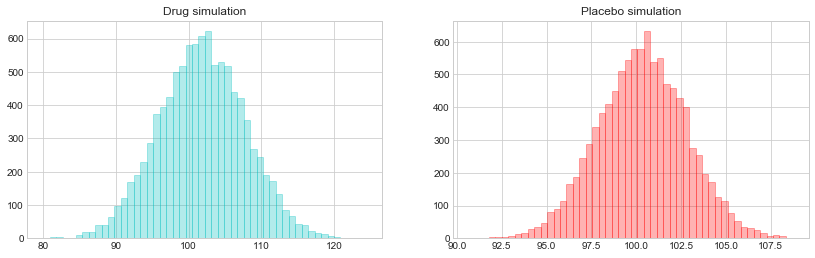

In [49]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.title("Drug simulation")
y1sim.plot(10000, edgecolor='c', color='c', bins=50, alpha=.3)
plt.subplot(122)
plt.title("Placebo simulation")
y2sim.plot(10000, edgecolor='r', color='r', bins=50, alpha=.3)

In [6]:
tmodel = pm.Model()

with tmodel:
    
    loc_a = pm.Normal("loca", mu=df.value.mean(), sd=df.value.std() * 2)
    loc_b = pm.Normal("locb", mu=df.value.mean(), sd=df.value.std() * 2)
    
    scale_a = pm.HalfCauchy("scalea", 1)
    scale_b = pm.HalfCauchy("scaleb", 1)
    
    nu = pm.Exponential("pld_df", lam=4)
    
    treat = pm.StudentT("treat", nu=nu, mu=loc_a, sd=scale_a, observed=y1)
    control = pm.StudentT("control", nu=nu, mu=loc_b, sd=scale_b, observed=y2)
    
    meandiff = pm.Deterministic("meandiff", loc_a - loc_b)
    effectsize = pm.Deterministic("effectsize", meandiff/((scale_a + scale_b)/2))

print("Model compiled")

Model compiled


In [7]:
with tmodel:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/conormd/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [pld_df_log__, scaleb_log__, scalea_log__, locb, loca]
100%|██████████| 2500/2500 [00:03<00:00, 705.71it/s]


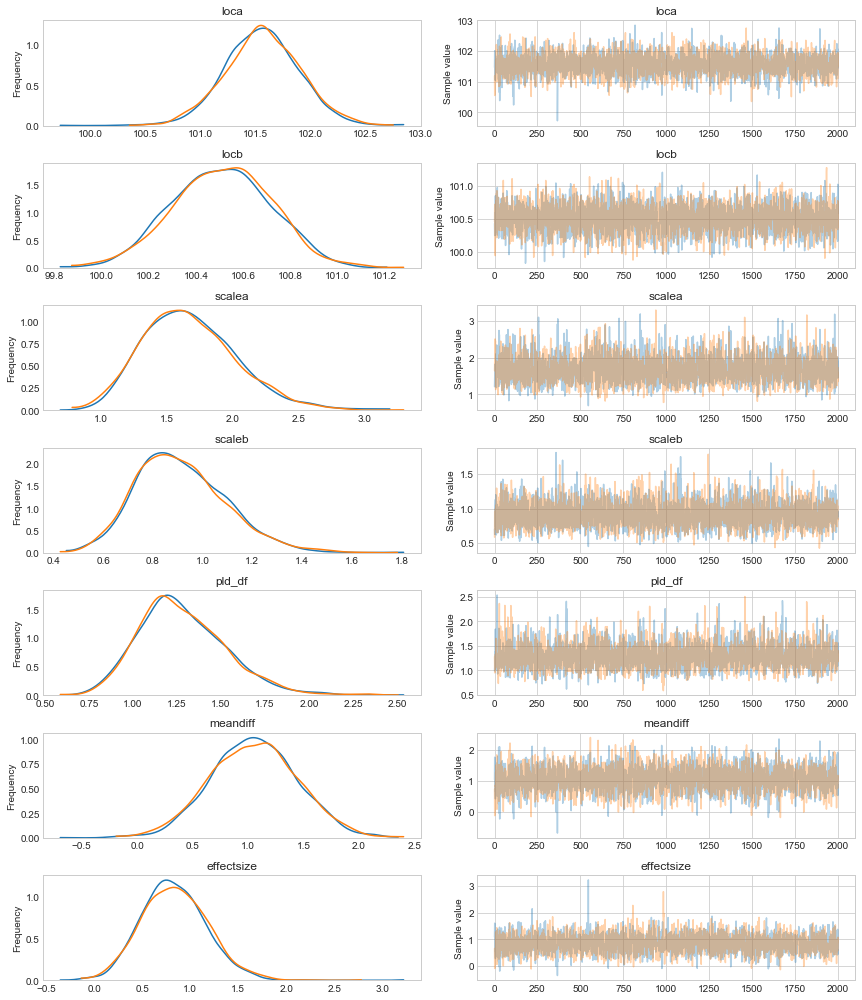

In [8]:
pm.traceplot(trace);

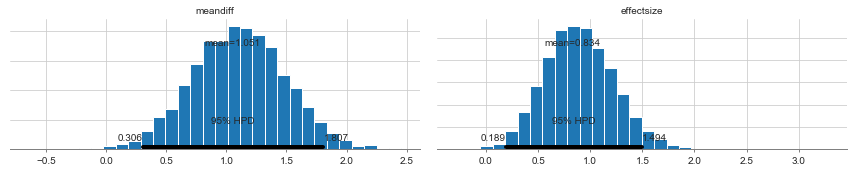

In [9]:
pm.plot_posterior(trace, varnames=["meandiff", "effectsize"]);

In [10]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
loca,101.560176,0.335208,0.005247,100.897317,102.213447,3733.0,0.999974
locb,100.509339,0.208736,0.002988,100.089296,100.892950,3742.0,0.999918
scalea,1.677773,0.357266,0.006425,1.041498,2.381181,3347.0,1.000711
scaleb,0.912478,0.181441,0.002583,0.583662,1.275788,4000.0,0.999868
pld_df,1.285306,0.250224,0.005133,0.823462,1.766571,2351.0,0.999756
meandiff,1.050837,0.390123,0.006328,0.306141,1.806625,3515.0,0.999785
effectsize,0.833883,0.337596,0.005873,0.188759,1.494345,3191.0,1.000053


In [15]:
t, p = stats.ttest_ind(y1, y2, equal_var=False)[:2]
print("p value is {}".format(p))

p value is 0.10975381983712831


In [20]:
(trace["meandiff"] > 0).sum() / trace["meandiff"].shape[0]

0.99525

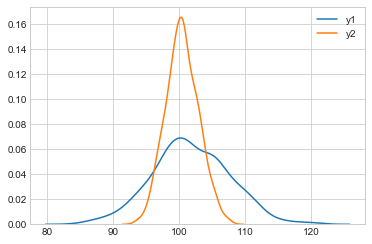

In [31]:
y1sim = np.random.normal(loc=y1.mean(), scale=y1.std(), size=1000)
y2sim = np.random.normal(loc=y2.mean(), scale=y2.std(), size=1000)
sns.kdeplot(y1sim, label="y1")
sns.kdeplot(y2sim, label="y2");

In [23]:
import pomegranate as pom

In [33]:
y1sim = pom.distributions.NormalDistribution.from_samples(y1)
y2sim = pom.distributions.NormalDistribution.from_samples(y2)

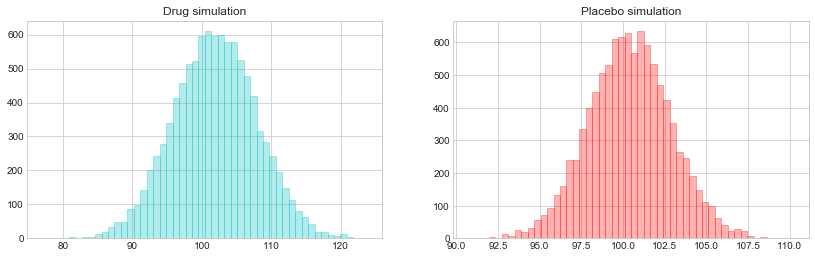

In [ ]:
pom.distributions.Stu
y1sim = pom.distributions..from_samples(y1)
y2sim = pom.distributions.NormalDistribution.from_samples(y2)
y1sim.plot(10000, edgecolor='c', color='c', bins=50, alpha=.3)
y2sim.plot(10000, edgecolor='r', color='r', bins=50, alpha=.3)